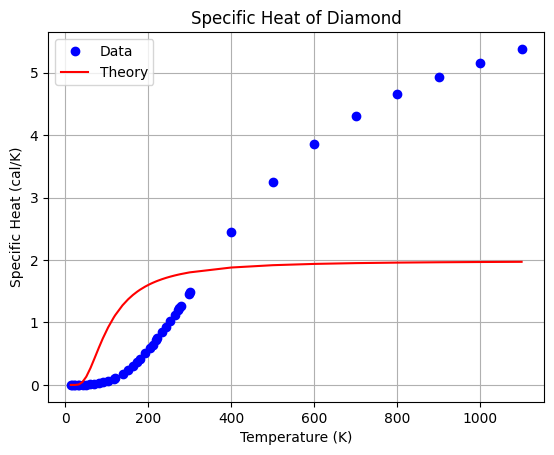

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# File path
file_path = '/Users/matthewgolden/Documents/School/Purdue/Spring 2024/Statistical Mechanics/diamond.dat'
# Load the data
data = np.loadtxt(file_path)

# Extract the first two columns
T = data[:, 0] # Temperature (K)
C = data[:, 1] # Specific heat (Cal/K)

# Constants
N = 6.022*pow(10,23) # Avogadro's number (molecules/mol)
k = 3.297*pow(10,-24) # Boltzmann's constant (Cal/K) #k = 1.3806*pow(10,-23) # Boltzmann's constant (J/K)
ℏ = 0.239*1.054*pow(10,-34) # Reduced Planck's constant (Cal*s)
ω = 4.25*pow(10,13) # Frequency of the phonon mode (Hz)
# Theroetical value of the specific heat (J/K) using the Einstein model of a solid
C_theory = N*k * pow((ℏ*ω/(k*T)),2) * np.exp(ℏ*ω/(k*T))/(pow(1 - np.exp(ℏ*ω/(k*T)),2))

# Plot the data
plt.plot(T, C, 'o', color='b', label='Data')
plt.plot(T, C_theory, '-', color='r', label='Theory')
plt.xlabel('Temperature (K)')
plt.ylabel('Specific Heat (cal/K)')
plt.title('Specific Heat of Diamond')
plt.legend(['Data', 'Theory'])
plt.grid()
plt.show()

Einstein's theory assumes that atoms in a solid vibrate harmonically around their equilibrium positions, similar to the behavior of simple harmonic oscillators. This assumption allows for the calculation of the heat capacity of a solid based on the quantized vibrational modes of its atoms.

While Einstein's theory works well for some solids, including many crystalline materials at low temperatures, it has limitations and potential inaccuracies for others, particularly in cases where anharmonic effects become significant. Anharmonicity refers to deviations from the harmonic oscillator model, where interactions between atoms lead to non-linear behavior in the potential energy.

For diamond, which is a highly symmetric and well-ordered crystal structure composed of carbon atoms arranged in a tetrahedral lattice, Einstein's theory may provide a reasonable approximation of its heat capacity at low temperatures. However, at higher temperatures or under extreme conditions, the anharmonic effects may start to become important, and Einstein's theory may not fully capture the behavior of diamond.

In such cases, more sophisticated theoretical approaches, such as the Debye model or first-principles calculations based on density functional theory (DFT), may provide better predictions of the heat capacity of diamond. These methods take into account more detailed aspects of the atomic interactions and vibrational properties of the material.

Therefore, while Einstein's theory of solids is a valuable tool for understanding the heat capacity of solids, including diamond, it is important to recognize its limitations and consider more advanced theoretical approaches when necessary.

In [1]:
# Constants
m = 1# Mass (kg)
c = 1# Speed of light (m/s)
p = np.linspace(0,10000,1000)#np.linspace(1*pow(10,-28),1*pow(10,-25),1000) # Momentum (kg*m/s)
k = 1 #8.617*pow(10,-5) #1.38*pow(10,-23) # Boltzmann's constant (J/K)
T = np.linspace(0.001, 10000, 100) # Temperature (K)
β = 1/(k*T) # Inverse energy (1/J)

# Partition function
Z = []
# Partition function for each momentum
Z_i = []
# Calculate the partition function
for j in range(len(β)): # Loop through the inverse energy
    for i in range(len(p)): # Loop through the momentum
        Z_i.append(np.exp(-β[j]*np.sqrt((p[i]**2)*(c**2) + (m**2)*(c**4)))) # Calculate the partition function for each momentum
    Z.append(np.sum(Z_i)) # Sum and add to the partition function
    Z_i = [] # Reset the partition function for each momentum
    
# Natural log of the partition function
lnZ = np.log(Z)
# Calculate the energy which is the negative derivative of the natural log of the partition function (-dlnZ)
E = -np.diff(lnZ)/np.diff(β)
# Calculate the specific heat
C = np.diff(E)/np.diff(T[1:])

NameError: name 'np' is not defined

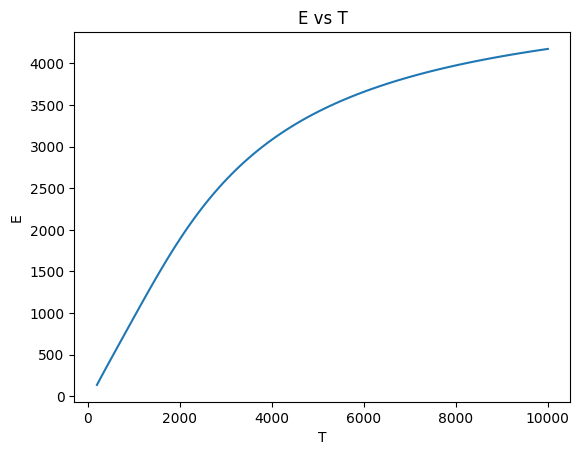

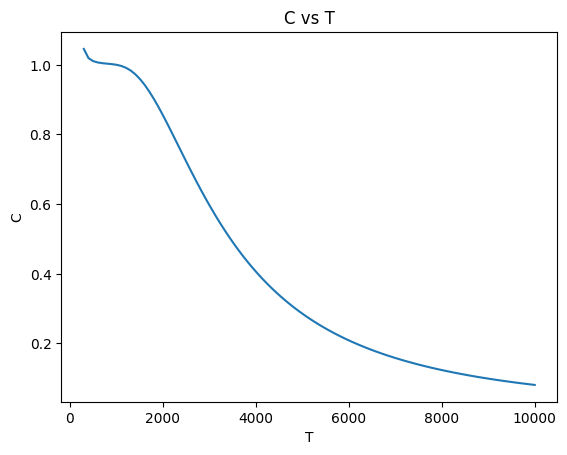

In [37]:
# Plot E vs T
plt.plot(T[1:], E, '-')
plt.xlabel('T')
plt.ylabel('E')
plt.title('E vs T')
plt.show()

# Plot C vs T
plt.plot(T[2:], C, '-')
plt.xlabel('T')
plt.ylabel('C')
plt.title('C vs T')
plt.show()

1. **Non-relativistic Regime**:
   - At low temperatures, the gas behaves non-relativistically, and the energy follows the classical $ E = \frac{3}{2}kT $ dependence for a monatomic ideal gas. 
   - The molar heat capacity C_V should be approximately constant and equal to $ \frac{3}{2}R $ (where R is the gas constant) in this regime.

2. **Transition Point**:
   - As temperature increases, the gas transitions from the non-relativistic to the ultra-relativistic regime.
   - The transition point occurs when the thermal energy kT becomes comparable to the rest mass energy of the particles, $ mc^2 $, where m is the mass of the particle and c is the speed of light.

3. **Ultra-relativistic Regime**:
   - At high temperatures, the gas behaves ultra-relativistically, and the energy follows the relativistic E = 3kT dependence for a monatomic ideal gas.
   - The molar heat capacity C_V should be approximately constant and equal to 3R in this regime.

In the plots you can see a clear transition from non-relativistic to ultra-relativistic.

In [38]:
# Partition function
Zj = []
# Quantum Angular Momentum
j = np.linspace(0, 1000, 101)
Z_j = []
# Calculate the partition function
for j in range(len(β)):
    for i in range(len(p)):
        for k in range(101):
            Z_j.append((2*j+1)*np.exp(-β[j]*((p[i]**2)/(2*m) + 0.5*(j*(j+1)))))
    Zj.append(np.sum(Z_j))
    Z_j = []
# Natural log of the partition function
lnZj = np.log(Zj)
# Calculate the energy which is the negative derivative of the natural log of the partition function (-dlnZ)
Ej = -np.diff(lnZj)/np.diff(β)
# Calculate the specific heat
Cj = np.diff(Ej)/np.diff(T[1:])

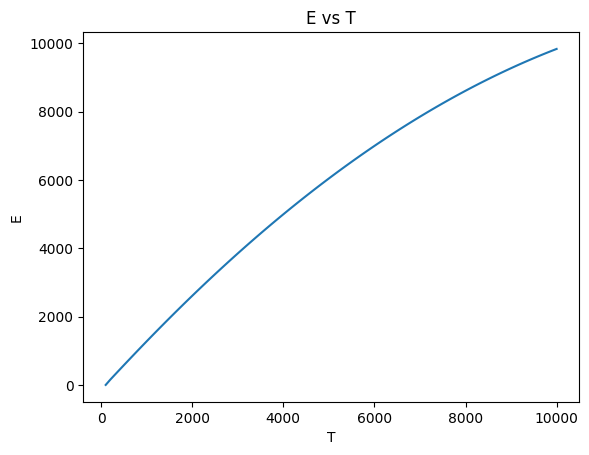

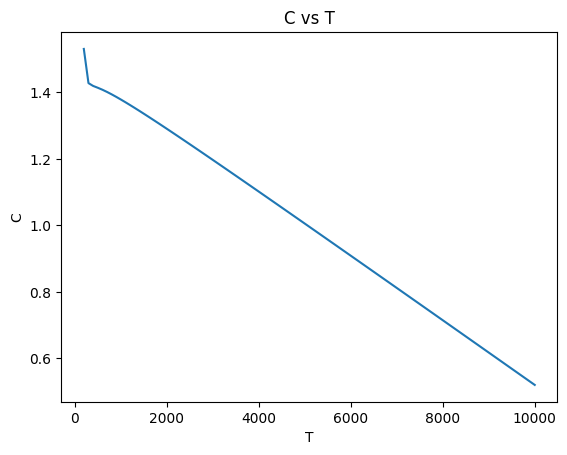

In [39]:
# Plot E vs T
plt.plot(T[1:], Ej, '-')
plt.xlabel('T')
plt.ylabel('E')
plt.title('E vs T')
plt.show()

# Plot C vs T
plt.plot(T[2:], Cj, '-')
plt.xlabel('T')
plt.ylabel('C')
plt.title('C vs T')
plt.show()

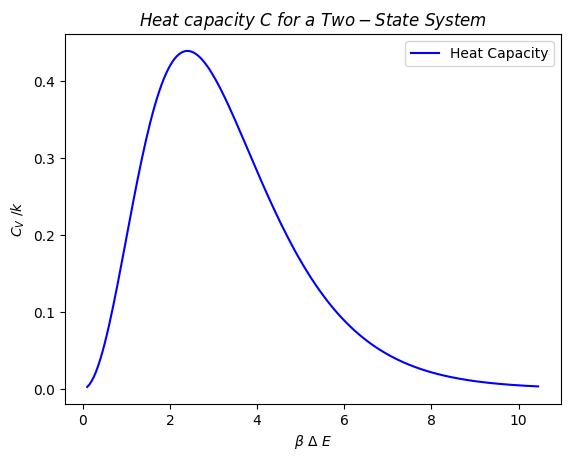

In [40]:
x = np.arange(0.1,10.5,0.05)
heat_capacity = x**2*np.exp(x) / (np.power(1+np.exp(x),2))

plt.plot(x,heat_capacity,color="blue",label="Heat Capacity")
plt.xlabel("$\\beta\ \Delta\ E$")
plt.ylabel("$C_V \ /k$")
plt.legend()
plt.title("$Heat\ capacity\ C\ for\ a\ Two-State\ System$")
plt.show()

In a classical system like a gas, the heat capacity at constant volume \( C_V \) is typically given by the Dulong-Petit law for monatomic gases, which states that $ C_V = 3R $ per mole of atoms, where $ R $ is the gas constant.

For a two-state system with energy separation $ \Delta E $, the heat capacity per particle $ C $ as a function of $ \beta \Delta E $ (where $ \beta = \frac{1}{kT} $, $ k $ is Boltzmann's constant, and $ T $ is the temperature) is given by:

$$ C = \frac{k \beta^2 \Delta E^2 e^{\beta \Delta E}}{(e^{\beta \Delta E} + 1)^2} $$

To compare this to the heat capacity of a classical system like a gas, we need to consider the limit of high temperature (large $ \beta \Delta E $) and low temperature (small $ \beta \Delta E $).

- At high temperatures (large $ \beta \Delta E $), the exponential term dominates, and $ e^{\beta \Delta E} $ approaches infinity. In this limit, the heat capacity per particle tends towards $ k \beta^2 \Delta E^2 $.

- At low temperatures (small $ \beta \Delta E $), the exponential term becomes negligible, and the heat capacity per particle tends towards zero.

Now, comparing this to the classical gas case:

- At high temperatures, the heat capacity of a classical gas approaches 3k , as per the Dulong-Petit law.

- At low temperatures, the heat capacity of a classical gas approaches zero.

Therefore, we can see that at high temperatures, the heat capacity of the two-state system approaches a constant (dependent on $ \Delta E $ and \( k \)) similar to the classical gas, although not exactly the same. At low temperatures, however, the behavior differs, as the classical gas's heat capacity approaches zero while the two-state system's heat capacity also approaches zero, but with a different behavior dictated by the exponential term in its equation.